In [ ]:
# DOCUMENTATION SECTION
# Machine Learnin Project using Multiple Linear Regression Model and Split Train Test to predict the Price of an House using Python
# PROJECT solely developed by THARUN BALAJI R 🧑‍💻
# Thanks to DevTown ❤️ 

### **LIBRARIES IMPORT SECTION**

In [ ]:
# Importing necessary modules
import math
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

### **ANALYSIS OF GIVEN DATASET**

In [ ]:
ds = pd.read_csv("/content/Housing.csv")

# Identifying column names, Datatypes and NULL count
ds

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
# Performing statistical analysis of columns from given data
ds.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### **DATASET VISUALISATION using MatplotLib**

In [ ]:
# Data Analysing and Visulaisation section

D = ds.to_dict('list')
print(D)
df = pd.DataFrame(D)

{'price': [13300000, 12250000, 12250000, 12215000, 11410000, 10850000, 10150000, 10150000, 9870000, 9800000, 9800000, 9681000, 9310000, 9240000, 9240000, 9100000, 9100000, 8960000, 8890000, 8855000, 8750000, 8680000, 8645000, 8645000, 8575000, 8540000, 8463000, 8400000, 8400000, 8400000, 8400000, 8400000, 8295000, 8190000, 8120000, 8080940, 8043000, 7980000, 7962500, 7910000, 7875000, 7840000, 7700000, 7700000, 7560000, 7560000, 7525000, 7490000, 7455000, 7420000, 7420000, 7420000, 7350000, 7350000, 7350000, 7350000, 7343000, 7245000, 7210000, 7210000, 7140000, 7070000, 7070000, 7035000, 7000000, 6930000, 6930000, 6895000, 6860000, 6790000, 6790000, 6755000, 6720000, 6685000, 6650000, 6650000, 6650000, 6650000, 6650000, 6650000, 6629000, 6615000, 6615000, 6580000, 6510000, 6510000, 6510000, 6475000, 6475000, 6440000, 6440000, 6419000, 6405000, 6300000, 6300000, 6300000, 6300000, 6300000, 6293000, 6265000, 6230000, 6230000, 6195000, 6195000, 6195000, 6160000, 6160000, 6125000, 6107500, 

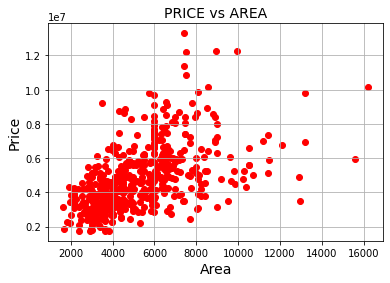

In [ ]:
# Relationship between Price and Area of House

plt.scatter(df['area'],df['price'],color='red')
plt.title('PRICE vs AREA',fontsize = 14)
plt.xlabel('Area',fontsize = 14)
plt.ylabel('Price',fontsize = 14)
plt.grid(True)
plt.show()

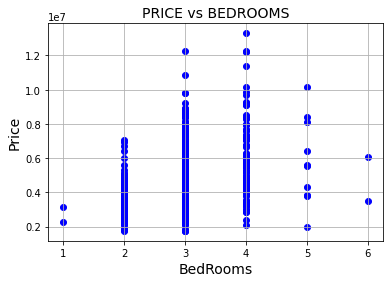

In [ ]:
# Relationship between Price and Count of Bedrooms in House

plt.scatter(df['bedrooms'],df['price'],color='blue')
plt.title('PRICE vs BEDROOMS',fontsize = 14)
plt.xlabel('BedRooms',fontsize = 14)
plt.ylabel('Price',fontsize = 14)
plt.grid(True)
plt.show()

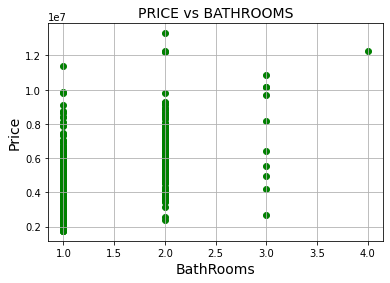

In [ ]:
# Relationship between Price and Count of Bathrooms in House

plt.scatter(df['bathrooms'],df['price'],color='green')
plt.title('PRICE vs BATHROOMS',fontsize = 14)
plt.xlabel('BathRooms',fontsize = 14)
plt.ylabel('Price',fontsize = 14)
plt.grid(True)
plt.show()

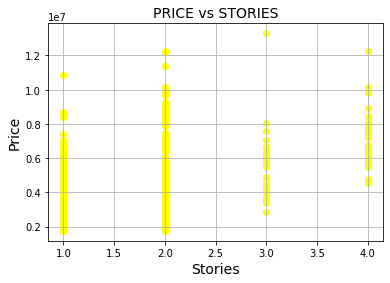

In [ ]:
# Relationship between Price and Count of Stories of House

plt.scatter(df['stories'],df['price'],color='yellow')
plt.title('PRICE vs STORIES',fontsize = 14)
plt.xlabel('Stories',fontsize = 14)
plt.ylabel('Price',fontsize = 14)
plt.grid(True)
plt.show()

Text(0, 0.5, 'Price')

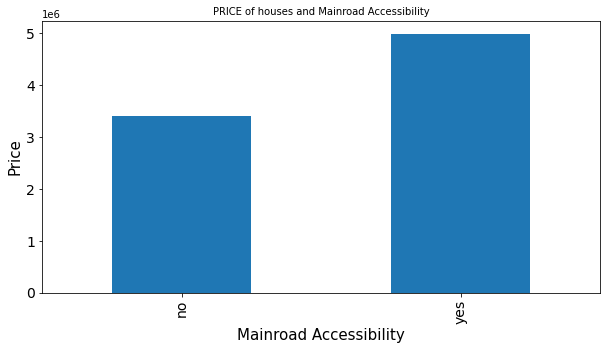

In [ ]:
# Relationship between Price and MainRoad accessibility for an House

ax = ds.groupby(['mainroad'])['price'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)

ax.set_title("PRICE of houses and Mainroad Accessibility", fontsize = 10)

ax.set_xlabel("Mainroad Accessibility",fontsize = 15)
ax.set_ylabel("Price",fontsize = 15)

Text(0, 0.5, 'Price')

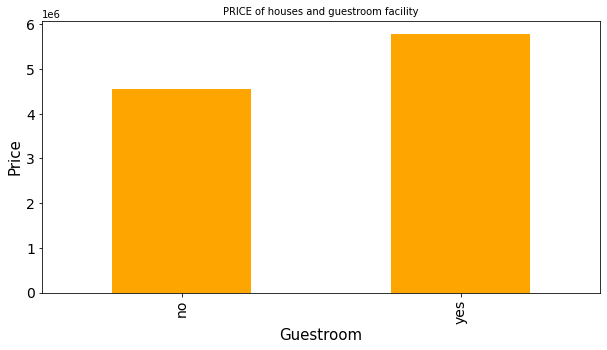

In [ ]:
# Relationship between Price and Count of Guestrooms in an House

ax = ds.groupby(['guestroom'])['price'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14,
    color = 'orange'
)

ax.set_title("PRICE of houses and guestroom facility", fontsize = 10)

ax.set_xlabel("Guestroom",fontsize = 15)
ax.set_ylabel("Price",fontsize = 15)

Text(0, 0.5, 'Price')

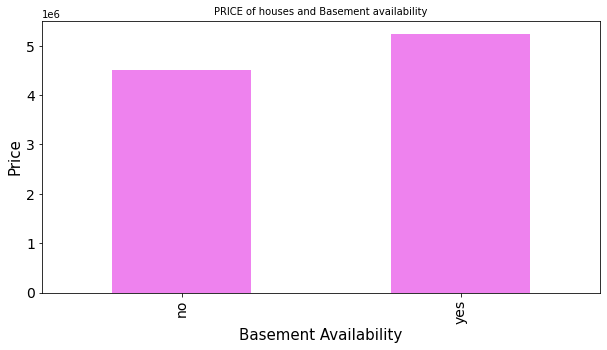

In [ ]:
# Relationship between Price and Basement Availability in an House

ax = ds.groupby(['basement'])['price'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14,
    color = 'violet'
)

ax.set_title("PRICE of houses and Basement availability", fontsize = 10)

ax.set_xlabel("Basement Availability",fontsize = 15)
ax.set_ylabel("Price",fontsize = 15)

Text(0, 0.5, 'Price')

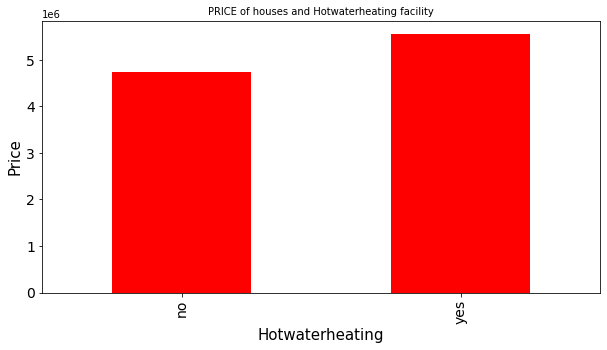

In [ ]:
# Relationship between Price and HotWaterHeating Facility in an House

ax = ds.groupby(['hotwaterheating'])['price'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14,
    color = 'red'
)

ax.set_title("PRICE of houses and Hotwaterheating facility", fontsize = 10)

ax.set_xlabel("Hotwaterheating",fontsize = 15)
ax.set_ylabel("Price",fontsize = 15)

Text(0, 0.5, 'Price')

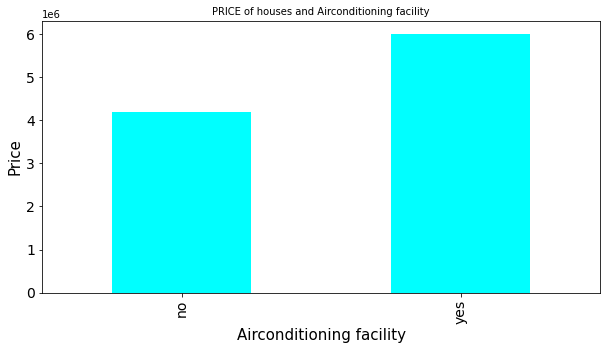

In [ ]:
# Relationship between Price and Airconditioing facility in an House

ax = ds.groupby(['airconditioning'])['price'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14,
    color = 'cyan'
)

ax.set_title("PRICE of houses and Airconditioning facility", fontsize = 10)

ax.set_xlabel("Airconditioning facility",fontsize = 15)
ax.set_ylabel("Price",fontsize = 15)

Text(0, 0.5, 'Price')

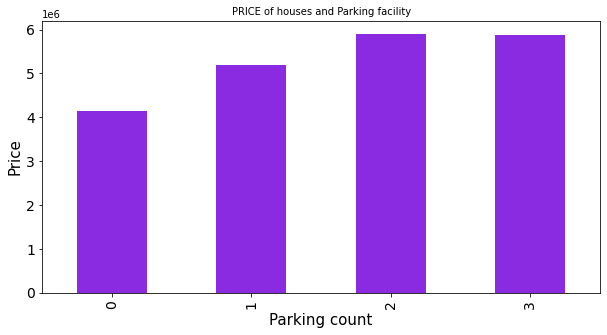

In [ ]:
# Relationship between Price and Count of Parking facility for an House

ax = ds.groupby(['parking'])['price'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14,
    color = 'blueviolet'
)

ax.set_title("PRICE of houses and Parking facility", fontsize = 10)

ax.set_xlabel("Parking count",fontsize = 15)
ax.set_ylabel("Price",fontsize = 15)

Text(0, 0.5, 'Price')

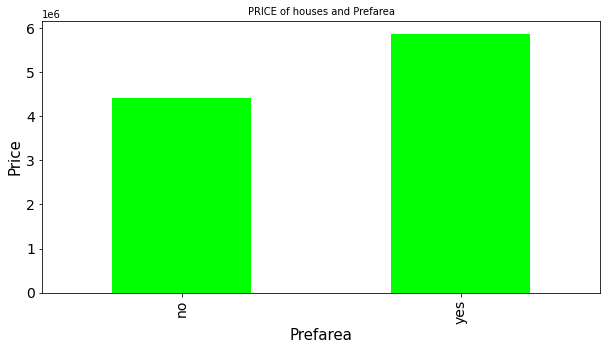

In [ ]:
# Relationship between Price and Prefarea for an House

ax = ds.groupby(['prefarea'])['price'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14,
    color = 'lime'
)

ax.set_title("PRICE of houses and Prefarea", fontsize = 10)

ax.set_xlabel("Prefarea",fontsize = 15)
ax.set_ylabel("Price",fontsize = 15)

Text(0, 0.5, 'Price')

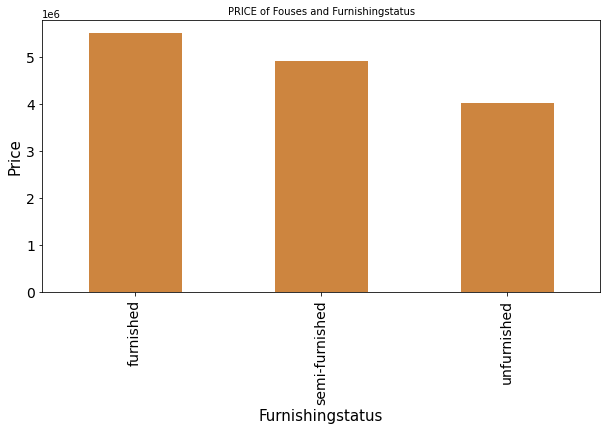

In [ ]:
# Relationship between Price and Furnishing Status for an House

ax = ds.groupby(['furnishingstatus'])['price'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14,
    color = 'peru'
)

ax.set_title("PRICE of Fouses and Furnishingstatus", fontsize = 10)

ax.set_xlabel("Furnishingstatus",fontsize = 15)
ax.set_ylabel("Price",fontsize = 15)

### **MANIPULATING ORIGINAL DATASET**

In [ ]:
# Converting string data object 'yes' and 'no' into binary data object

for i in range(len(ds['mainroad'])):
  if ((ds['mainroad'][i]) == 'no'):
    ds['mainroad'][i] = 0
  elif ((ds['mainroad'][i]) == 'yes'):
    ds['mainroad'][i] = 1

for i in range(len(ds['guestroom'])):
  if ((ds['guestroom'][i]) == 'no'):
    ds['guestroom'][i] = 0
  elif ((ds['guestroom'][i]) == 'yes'):
    ds['guestroom'][i] = 1

for i in range(len(ds['basement'])):
  if ((ds['basement'][i]) == 'no'):
    ds['basement'][i] = 0
  elif ((ds['basement'][i]) == 'yes'):
    ds['basement'][i] = 1

for i in range(len(ds['hotwaterheating'])):
  if ((ds['hotwaterheating'][i]) == 'no'):
    ds['hotwaterheating'][i] = 0
  elif ((ds['hotwaterheating'][i]) == 'yes'):
    ds['hotwaterheating'][i] = 1

for i in range(len(ds['airconditioning'])):
  if ((ds['airconditioning'][i]) == 'no'):
    ds['airconditioning'][i] = 0
  elif ((ds['airconditioning'][i]) == 'yes'):
    ds['airconditioning'][i] = 1

for i in range(len(ds['prefarea'])):
  if ((ds['prefarea'][i]) == 'no'):
    ds['prefarea'][i] = 0
  elif ((ds['prefarea'][i]) == 'yes'):
    ds['prefarea'][i] = 1

In [ ]:
# From given data set, Furnishingstatus is a categorized data form

ds.furnishingstatus.value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [ ]:
# Splitting the catergorized Furnishingstatus data form into sepearate columns

ds['furnished'] = np.where(ds['furnishingstatus']=='furnished',1,0)
ds['semi-furnished'] = np.where(ds['furnishingstatus']=='semi-furnished',1,0)
ds['unfurnished'] = np.where(ds['furnishingstatus']=='unfurnished',1,0)

In [ ]:
# Deleting 'Furnishingstatus' column from original dataset

ds.drop(columns=['furnishingstatus'],axis=1,inplace=True)

In [ ]:
# Manipulated Dataset

ds

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Using the above Manipulated dataset, dependent and independent variables are classified

dep_var = 'price'
indep_var = ds.columns.tolist()
indep_var.remove(dep_var)

indep_var

['area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnished',
 'semi-furnished',
 'unfurnished']

### **SPLIT TRAIN TEST AND SCALER METHOD**

In [ ]:
X = ds[indep_var].values
Y = ds[dep_var].values

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=0)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **LINEAR REGRESSION MODEL Multivariate type**

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_pred = model.predict(X_test)

### **PREDICTED ERROR AND RESULT**

In [ ]:
print("Error:",math.sqrt(mean_squared_error(Y_test,Y_pred)))


Error: 974595.8399248527


In [ ]:
print("Accuracy (R2 score):",r2_score(Y_test,Y_pred))

Accuracy (R2 score): 0.7261750392881281
